In [445]:
# import all required modules
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot
import seaborn as sns
import os
% matplotlib inline

In [446]:
# read all file names
file_names = os.listdir("energy_consumption_data")

# read into dataframes
consumption_person_df = pd.read_csv("energy_consumption_data/"+file_names[1], encoding="UTF-8")

# extract all column names
column_units = list(consumption_person_df.iloc[0])
column_names = list(consumption_person_df.columns)

# modify old column names to fit into the new data
new_columns = []
for i in range(len(column_names)):
    name = column_names[i]
    unit = column_units[i]
    if "Unnamed" in name:
        name = "Year"
    #if str(unit) == 'nan':
    #    unit = "year"
    new_columns.append(name)

# trim data and rename columns
consumption_person_df = consumption_person_df.ix[1:,:]
consumption_person_df.columns = new_columns

# reset index to ensure consistency
consumption_person_df.reset_index(drop=True, inplace=True)

# change all years into consistent format
for i in range(len(consumption_person_df)):
    consumption_person_df.iloc[i,0] = 1990+i
    
consumption_person_df

,Year,Population,GSP,Energy consumption,Energy consumption per capita,Energy intensity,Energy productivity
0,1990,4420373.00,176618.00,1091.00,247.00,6177.00,162.00
1,1991,4450217.00,174085.00,1109.00,249.00,6370.00,157.00
2,1992,4462766.00,182347.00,1105.00,248.00,6060.00,165.00
3,1993,4472989.00,188796.00,1103.00,247.00,5842.00,171.00
4,1994,4497660.00,194576.00,1152.00,256.00,5921.00,169.00
5,1995,4534984.00,201606.00,1185.00,261.00,5878.00,170.00
6,1996,4569297.00,209848.00,1203.00,263.00,5733.00,174.00
7,1997,4606970.00,220823.00,1286.00,279.00,5824.00,172.00
8,1998,4652462.00,234913.00,1318.00,283.00,5611.00,178.00
9,1999,4704065.00,244152.00,1346.00,286.00,5513.00,181.00


In [447]:
# read data into dataframes
consumption_fuel_df = pd.read_csv("energy_consumption_data/"+file_names[0], encoding="UTF-8")

# select only needed section
consumption_fuel_df = consumption_fuel_df.ix[0:,:-2]

# choose new column names
csptn_cln = []
for i in range(len(consumption_fuel_df.columns)):
    name = consumption_fuel_df.iloc[0,i]
    if str(name) == 'nan':
        name = "Year"
    csptn_cln.append(name)

# change all column names
consumption_fuel_df = consumption_fuel_df.ix[2:,:]
consumption_fuel_df.columns = csptn_cln

# reset index
consumption_fuel_df.reset_index(drop=True, inplace=True)

# change year to consistent format
for i in range(len(consumption_fuel_df)):
    consumption_fuel_df.iloc[i,0] = 1990+i
consumption_fuel_df

,Year,Black coal,"Wood, woodwaste",Petroleum products b,Natural gas,Town gas,Electricity,Solar energy
0,1990,2.00,1953.00,10638.00,6551.00,31.00,38226.00,35.00
1,1991,0.20,1960.00,10459.00,5825.00,32.00,38476.00,35.00
2,1992,0.20,1981.00,10455.00,6048.00,34.00,38907.00,38.00
3,1993,0.20,2031.00,10785.00,6215.00,35.00,39642.00,39.00
4,1994,0.20,2106.00,11213.00,5955.00,20.00,39229.00,39.00
5,1995,0.20,2110.00,11567.00,6596.00,21.00,40229.00,42.00
6,1996,0.20,2141.00,11832.00,6685.00,22.00,40062.00,42.00
7,1997,0.20,2154.00,11868.00,6079.00,22.00,41145.00,42.00
8,1998,0.20,2088.00,12210.00,6100.00,22.00,44258.00,42.00
9,1999,0.20,2078.00,12563.00,5936.00,22.00,46782.00,42.00


In [463]:
# read all climate files in the directory
files = os.listdir("climate_data")
climate_files = []
for file in files:
    if "Annual" in file and ".txt" in file:
        climate_files.append(file)

# extract all their file names for later column naming
# read and clean every datafile and save each as a new csv
processed_file_names = []
for file_name in climate_files:
    new_file_name = file_name[:-4] + " clean.csv"
    new_file = open(new_file_name, 'w+')
    file = open("climate_data/" + file_name, "r")
    header = "{0},{1}\n".format("Year", file_name[:-14])
    new_file.writelines(header)
    
    # select data from 1990 to 2014
    for line in file:
        year = int(line[:4])
        if year < 1990 or year > 2014:
            continue
        # format each data
        data = ""
        for char in line[12:]:
            if char == " ":
                continue
            else:
                data += char
        new_line = "{0},{1}\n".format(year, float(data))
        new_file.writelines(new_line)
        
    processed_file_names.append(new_file_name)
    new_file.close()
    file.close()

# read every cleaned csv and merge into a new dataframe
climate_df = pd.read_csv(processed_file_names[0], encoding="UTF-8")
for i in range(1, len(processed_file_names)):
    file_name = processed_file_names[i]
    temp_climate_df = pd.read_csv(file_name, encoding="UTF-8")
    climate_df = pd.merge(climate_df, temp_climate_df)
climate_df

,Year,Annual 3pm Cloud VIC,Annual 9am Cloud VIC,Annual Daytime Cloud VIC,Annual Diurnal T Rang Anomaly VIC,Annual Maximum Temperature Anomaly VIC,Annual Mean Temperature Anomaly VIC,Annual Minimum Temperature Anomaly VIC,Annual Pan Evaporation VIC,Annual Rainfall Anomally VIC,Annual Rainfall VIC
0,1990,4.73,4.47,4.61,-0.11,0.44,0.50,0.56,1451.83,-20.32,639.92
1,1991,4.61,4.45,4.54,0.02,0.25,0.24,0.23,1412.76,2.74,662.98
2,1992,5.15,4.94,5.06,-1.02,-0.90,-0.38,0.14,1198.91,189.66,849.90
3,1993,4.79,4.44,4.62,-0.11,0.09,0.16,0.21,1263.50,99.91,760.15
4,1994,4.58,4.33,4.47,0.72,0.36,-0.00,-0.37,1426.07,-170.95,489.29
5,1995,4.92,4.66,4.79,-0.45,-0.65,-0.41,-0.19,1367.18,57.51,717.75
6,1996,4.83,4.53,4.69,-0.28,-0.64,-0.49,-0.35,1369.20,48.89,709.13
7,1997,4.47,4.22,4.35,0.73,0.63,0.27,-0.10,1516.27,-195.17,465.07
8,1998,4.57,4.31,4.45,0.33,0.20,0.05,-0.12,1469.31,-46.85,613.39
9,1999,4.61,4.21,4.41,0.24,0.58,0.47,0.34,1402.23,-56.03,604.21


In [254]:
# read all emission files from the directory
file_names = os.listdir("emission_data")
file = open("emission_data/"+file_names[0], 'r')

# create a new file to save cleaned data
new_file_name = file_names[0][:-4]+" clean.csv"
new_file = open(new_file_name, 'w+')

# remove thousand seperator and change semicolon to comma
for line in file:
    new_line = ""
    for char in line:
        if char == ',':
            continue
        elif char == ';':
            new_line+=','
        else:
            new_line+=char
    new_file.writelines(new_line[:-2]+'\n')
new_file.close()

# read the new cleansed data file into a new dataframe and take a transpose of it
emission_df = pd.read_csv(new_file_name)
emission_df = emission_df.transpose()

# get all column names
column_names = list(emission_df.iloc[0])
column_names.insert(0, "Year")

# select only the data section
emission_df = emission_df.ix[1:,:]

# reset all index to ensure consistency in merging
emission_df.reset_index(inplace=True)

# change column names
emission_df.columns = column_names
emission_df

,Year,Energy,Industrial Processes,Agriculture,Land Use Land-Use Change and Forestry KP,Waste,Total:
0,1990,79328,2702.61,15066.9,610.79,5276.42,102985
1,1991,80633.7,2679.12,14756,-225.33,5218.74,103062
2,1992,82174.7,2639.92,14594.4,-2321.58,5164.26,102252
3,1993,80559.1,2450.67,14132,-2820.42,5107.43,99428.8
4,1994,80323,1983.92,14711.5,-1523.48,4873.15,100368
5,1995,84376,1821.39,14493.5,-3389.57,4872.82,102174
6,1996,86951.8,1677.22,14904.6,-3836.85,4258.29,103955
7,1997,89586.1,1715.21,15141.4,-728.01,4205.07,109920
8,1998,96153.7,2019.27,14552.4,-4709.39,3907.55,111924
9,1999,98120.4,1991.61,14780.3,-5235.81,4014.38,113671


In [255]:
# get column names of climate and emission dataframes
clm_cln = climate_df.columns
ems_cln = emission_df.columns


# function to calculate the correlation matrix
def corr_matrix(df1, df2):
    # ensure consistent numerical types
    df1 = df1.astype(float)
    df2 = df2.astype(float)
    
    # remove year column
    df1 = df1.ix[:,1:]
    df2 = df2.ix[:,1:]
    
    # get all column names
    df1_cln = df1.columns
    df2_cln = df2.columns
    
    # check correlation between each pair of columns from two datasets
    # save it into a 2d list
    corr_2d_lst = []
    for i in range(len(df1_cln)):
        curr_cln1 = df1_cln[i]
        series1 = df1[curr_cln1]
        
        corr_lst = []
        for j in range(len(df2_cln)):
            curr_cln2 = df2_cln[j]
            series2 = df2[curr_cln2]
            
            temp_df = pd.merge(pd.DataFrame(series1), pd.DataFrame(series2), left_index=True, right_index=True)
            corr_matrix = temp_df.corr()
            value = corr_matrix.iloc[0,1]
            corr_lst.append(value)
            
        corr_2d_lst.append(corr_lst)
    
    # name all columns
    final_df = pd.DataFrame(corr_2d_lst, columns=df2_cln)
    # set new indexes
    final_df.set_index(df1_cln, inplace=True, drop=True)
    return final_df

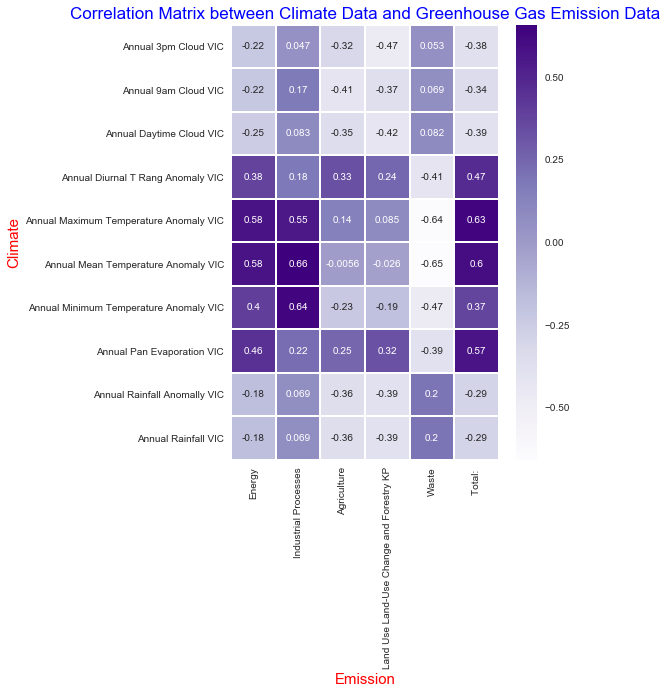

In [423]:
# heatmap of Correlation Matrix between Climate Data and Greenhouse Gas Emission Data 
matrix = corr_matrix(climate_df, emission_df)
fig, ax = plt.subplots(figsize=(6,8))
sns.heatmap(matrix, linewidths=1.0, cmap="Purples", annot=False, center=0)
plt.title("Correlation Matrix between Climate Data and Greenhouse Gas Emission Data", fontsize=17, alpha=1.0, color="Blue")
plt.xlabel("Emission", fontsize=15, color="Red")
plt.ylabel("Climate", fontsize=15, color="Red")

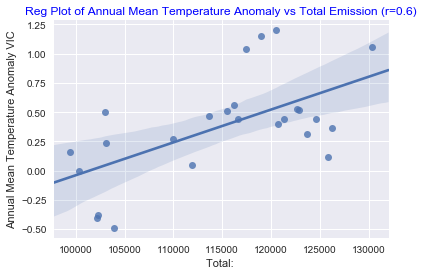

In [440]:
# reg plot of Annual Mean Temperature Anomaly vs Total Emission 
sns.regplot(emission_df[ems_cln[6]].astype(float), climate_df[clm_cln[6]])
plt.title('Reg Plot of Annual Mean Temperature Anomaly vs Total Emission (r=0.6)', color="Blue")

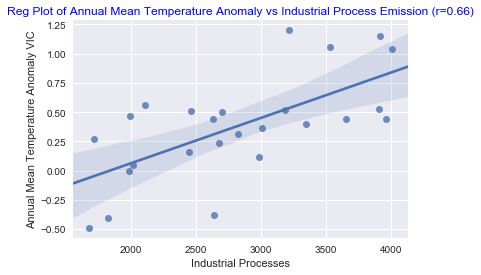

In [439]:
# Reg Plot of Annual Mean Temperature Anomaly vs Industrial Process Emission
sns.regplot(emission_df[ems_cln[2]].astype(float), climate_df[clm_cln[6]])
plt.title('Reg Plot of Annual Mean Temperature Anomaly vs Industrial Process Emission (r=0.66)', color="Blue")

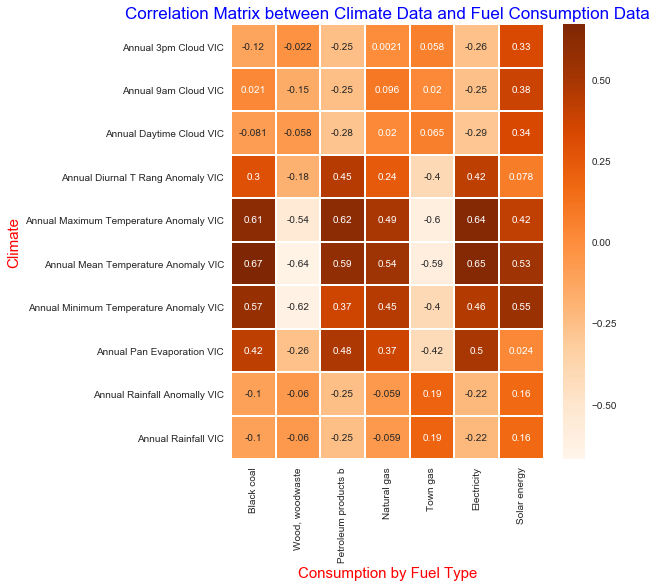

In [441]:
# heatmap of Correlation Matrix between Climate Data and Fuel Consumption Data
matrix = corr_matrix(climate_df, consumption_fuel_df)
fig, ax = plt.subplots(figsize=(7,8))
sns.heatmap(matrix, linewidths=1.0, cmap="Oranges", annot=False)
plt.title("Correlation Matrix between Climate Data and Fuel Consumption Data", fontsize=17, alpha=1.0, color="Blue")
plt.xlabel("Consumption by Fuel Type", fontsize=15, color="Red")
plt.ylabel("Climate", fontsize=15, color="Red")

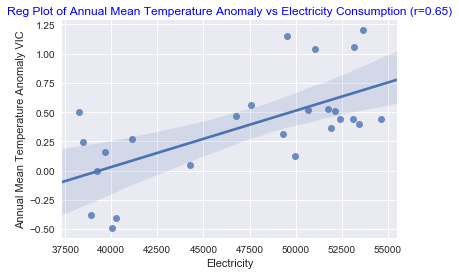

In [451]:
# reg plot of Annual Mean Temperature Anomaly vs Electricity Consumption
sns.regplot(consumption_fuel_df[csptn_cln[6]].astype(float), climate_df[clm_cln[6]])
plt.title('Reg Plot of Annual Mean Temperature Anomaly vs Electricity Consumption (r=0.65)', color="Blue")

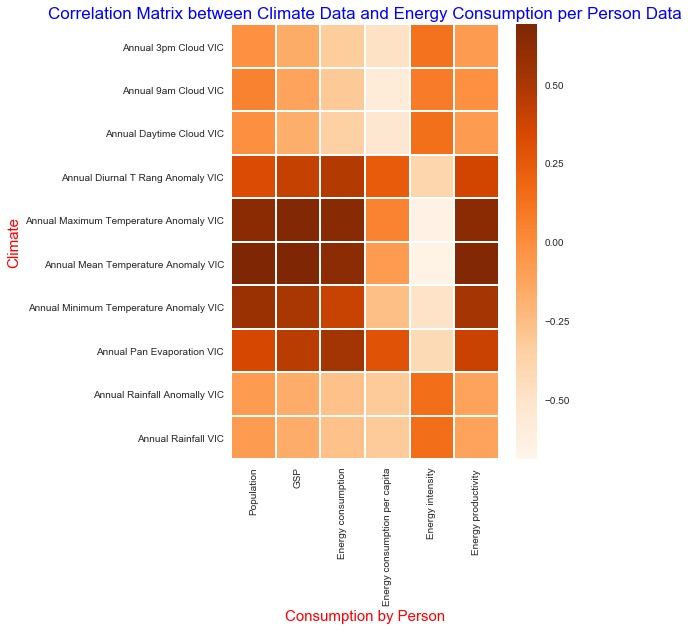

In [407]:
# heatmap of Correlation Matrix between Climate Data and Energy Consumption per Person Data
matrix = corr_matrix(climate_df, consumption_person_df)
fig, ax = plt.subplots(figsize=(6,8))
sns.heatmap(matrix, linewidths=1.0, cmap="Oranges")
plt.title("Correlation Matrix between Climate Data and Energy Consumption per Person Data", fontsize=17, alpha=1.0, color="Blue")
plt.xlabel("Consumption by Person", fontsize=15, color="Red")
plt.ylabel("Climate", fontsize=15, color="Red")

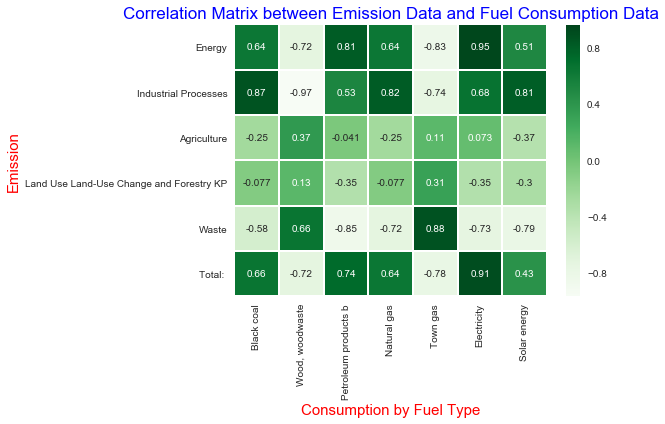

In [453]:
# heatmap of Correlation Matrix between Emission Data and Fuel Consumption Data
matrix = corr_matrix(emission_df, consumption_fuel_df)
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(matrix, linewidths=1.0, cmap="Greens", annot=True)
plt.title("Correlation Matrix between Emission Data and Fuel Consumption Data", fontsize=17, alpha=1.0, color="Blue")
plt.xlabel("Consumption by Fuel Type", fontsize=15, color="Red")
plt.ylabel("Emission", fontsize=15, color="Red")

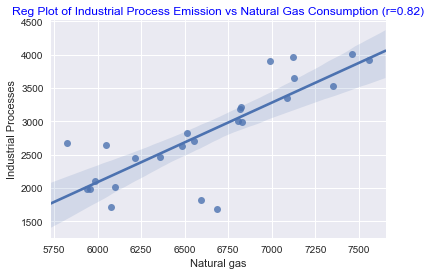

In [459]:
# Reg Plot of Industrial Process Emission vs Natural Gas Consumption
sns.regplot(consumption_fuel_df[csptn_cln[4]].astype(float), emission_df[ems_cln[2]])
plt.title('Reg Plot of Industrial Process Emission vs Natural Gas Consumption (r=0.82)', color="Blue")

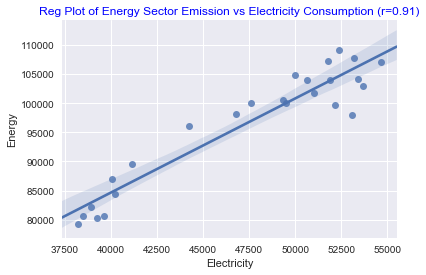

In [462]:
# Reg Plot of Energy Sector Emission vs Electricity Consumption
sns.regplot(consumption_fuel_df[csptn_cln[6]].astype(float), emission_df[ems_cln[1]])
plt.title('Reg Plot of Energy Sector Emission vs Electricity Consumption (r=0.91)', color="Blue")

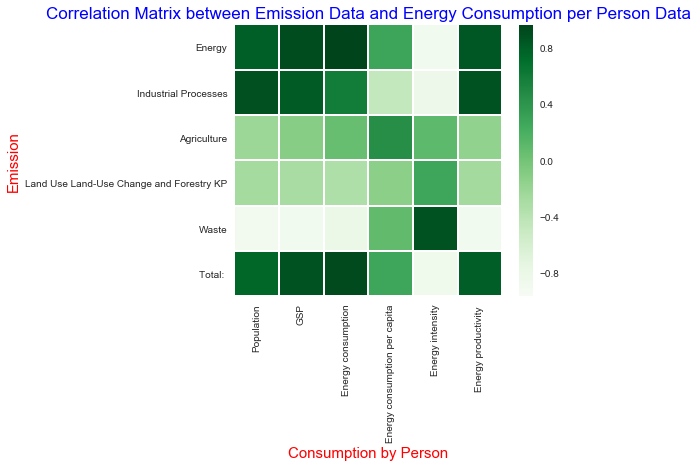

In [410]:
# Correlation Matrix between Emission Data and Energy Consumption per Person Data
matrix = corr_matrix(emission_df, consumption_person_df)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(matrix, linewidths=1.0, linecolor="white", cmap="Greens")
plt.title("Correlation Matrix between Emission Data and Energy Consumption per Person Data", fontsize=17, alpha=1.0, color="Blue")
plt.xlabel("Consumption by Person", fontsize=15, color="Red")
plt.ylabel("Emission", fontsize=15, color="Red")